In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import datetime
import pytz

In [2]:
# Up Right Down Left # 時計回り
u_r_d_l = [(-1, 0), (0, 1), (1, 0), (0, -1)]
def get_index(location_num, u_r_d_l):
    index_array = location_num + np.array(u_r_d_l)
    # 周期境界条件
    index_array = np.where(index_array==-1, grid_number-1, index_array)
    index_array = np.where(index_array==grid_number, 0, index_array)
    return index_array

In [3]:
def state_update(state_m1, grid_number, J_kt, B, dim):
    i = np.random.randint(grid_number)
    j = np.random.randint(grid_number)
    location = (i, j)
    index_array = get_index(location, u_r_d_l)
    g = np.sum([state_m1[:, i, j]*state_m1[:, index_array[k, 0], index_array[k, 1]] for k in range(index_array.shape[0])])
    alpha = -2*(J_kt*g + B*np.sum(state_m1[:, i, j]))
    if(np.random.rand() < np.exp(alpha)):
        state_m1[:, i, j] = -state_m1[:, i, j]
    return state_m1.copy()

In [4]:
def calc_by_temp(Spin_array, grid_number, step_count, J_kt, B, dim, slice_num):
    Spin_array_cp = Spin_array.copy()
    state_list = np.array([state_update(Spin_array_cp, grid_number, J_kt, B, dim) for l in range(step_count)])
    state_result = state_list[-slice_num:]
    return state_result

In [5]:
grid_number = 10
step_count = 100000
grid_space = 0.1
dim = 1
num = 100
slice_num = 10
J_kt_array = np.linspace(1, 0.1, num)
B = 0

In [6]:
np.random.seed(100)
Sx = np.random.choice([-1, 1], (grid_number, grid_number))
#Sy = np.random.choice([-1, 1], (grid_number, grid_number))

In [7]:
Spin_array = np.array([Sx])

<AxesSubplot:>

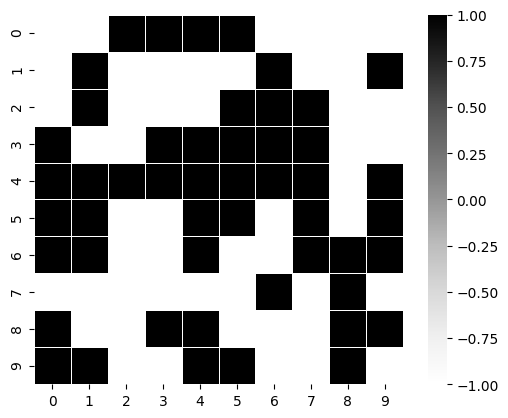

In [8]:
fig_1 = plt.figure()
ax_1 = fig_1.add_subplot(1, 1, 1)
sns.heatmap(Spin_array[0], cmap="Greys", vmin=-1, vmax=1, square=True, linewidths=0.5, ax = ax_1)

In [ ]:
state_result = np.array([calc_by_temp(Spin_array, grid_number, step_count, J_kt, B, dim, slice_num) for J_kt in J_kt_array])

In [ ]:
fig_3 = plt.figure()
ax_3 = fig_3.add_subplot(1, 1, 1)
sns.heatmap(state_result[0][0][0][:, :], cmap="Greys", vmin=-1, vmax=1, square=True, linewidths=0.5, ax = ax_3)

In [ ]:
#sum_list = np.array([np.abs(np.mean(state_result[i][0, :, :])) for i in range(len(J_kt_array))])
sum_list = np.array([[[np.abs(np.mean(state_result[i][j][k, :, :])) for i in range(len(J_kt_array))] for j in range(slice_num)] for k in range(dim)])
total_m = np.array([[np.sum(sum_list[:, i, j]) for j in range(num)]for i in range(slice_num)])

In [ ]:
ave_array = np.average(total_m, axis=0)
median_array = np.median(total_m, axis=0)

In [ ]:
total_m.shape

### 不変標準偏差の計算
#### https://algorithm.joho.info/programming/python-numpy-unbiased-standard-deviation/
#### https://dreamer-uma.com/mcmc-ising/

In [ ]:
#std_list = np.array([np.abs(np.std(state_result[i][0, :, :], ddof=1)) for i in range(len(J_kt_array))])

In [ ]:
# グラフ化用
fig_2 = plt.figure(
    figsize = (8, 6),
    facecolor = 'white'
)
# グラフの背景色の設定
ax_2 = fig_2.add_subplot(1, 1, 1)
# グラフ化用
# https://pystyle.info/matplotlib-invert-axis/
ax_2.invert_xaxis()
#ax_2.errorbar(J_kt_array, sum_list, yerr=std_list, capsize=3, fmt='o', ecolor = 'pink')
ax_2.plot(J_kt_array, ave_array, '-', label = r'$Average \ per \ Monte \ Carlo \ step$', color = 'blue', markersize = 2.0)
[ax_2.plot(J_kt_array, total_m[i], '.', color = 'black', markersize = 3.0) for i in range(total_m.shape[0])]
# https://www.haya-programming.com/entry/2018/10/11/131716
ax_2.set_facecolor((1,1,1,0))
# ラベルの設定
ax_2.set_xlabel(r"$J/k_B T$ [K]")
ax_2.set_ylabel(r"$M$[A/m]")
# 凡例の設定
ax_2.legend(loc = 'best')

In [ ]:
time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
#(年、月、日付、時、分、秒、マイクロ秒)
#見やすい形に変換
time = time.strftime('%m%d_monte_1213_Ising_2D_2.png')
# 図の保存
fig_2.savefig(time, facecolor = fig_2.get_facecolor())